will consider following few questions in analysin the data

1. Change in price of stock over a time?
2. Daily return of stock on average?
3. What is moving avg of various stocks?
4. Correlation between different stocks closing prices?
5. How much value do you put at risk by investing in particular stock?
6. How can we attempt to predict future stock behaviour?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [5]:
from pandas_datareader import data

In [10]:
import pandas_datareader as pdr

In [6]:
from datetime import datetime

In [7]:
tech_com = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year -1,end.month,end.day)

In [22]:
for stock in tech_com:
      globals()[stock] =  pdr.get_data_yahoo(stock,start,end)

In [23]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942
2019-10-07,57.482498,56.459999,56.567501,56.764999,122306000.0,56.207317
...,...,...,...,...,...,...
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.959999
2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,114.089996


In [24]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,1231.229980,1203.579956,1219.000000,1205.099976,1273500,1205.099976
2019-10-02,1196.979980,1171.290039,1196.979980,1176.630005,1615100,1176.630005
2019-10-03,1189.060059,1162.430054,1180.000000,1187.829956,1621200,1187.829956
2019-10-04,1211.439941,1189.170044,1191.890015,1209.000000,1162400,1209.000000
2019-10-07,1218.203979,1203.750000,1204.400024,1207.680054,842900,1207.680054


In [25]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,82.348494,80.125787,81.204449,81.334094,1.337452e+08,81.033624
std,19.417608,18.566322,19.182614,18.979595,5.631339e+07,19.133575
min,55.240002,53.152500,54.607498,54.740002,4.141920e+07,54.202213
25%,67.171875,65.780003,66.499998,66.626875,9.511890e+07,66.250765
50%,78.055000,76.146252,76.917500,77.381252,1.234140e+08,76.862240
75%,92.881876,90.824377,91.272499,91.526875,1.620759e+08,91.362148
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [27]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-10-01 to 2020-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


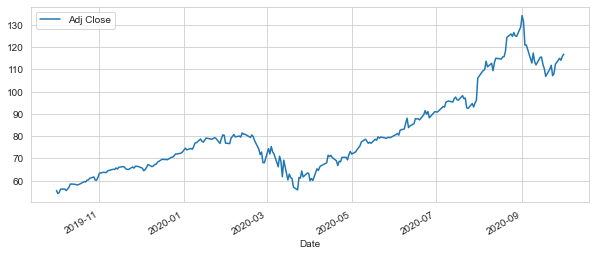

In [29]:
## Historical view of closing pricd

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

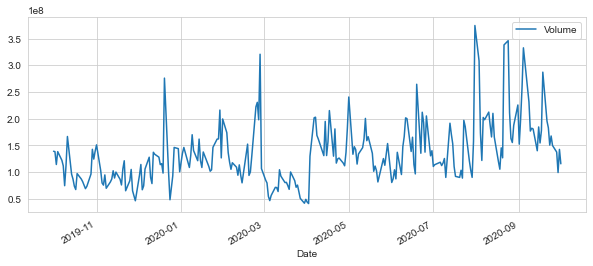

In [30]:
## volume of a stock
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [31]:
## calculating moving avg of the stock

ma_day = [10,20,50] ## calculating 10 day,20 day,50 day moving avg

In [48]:
for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    
    AAPL[column_name] = AAPL.rolling(ma).mean()

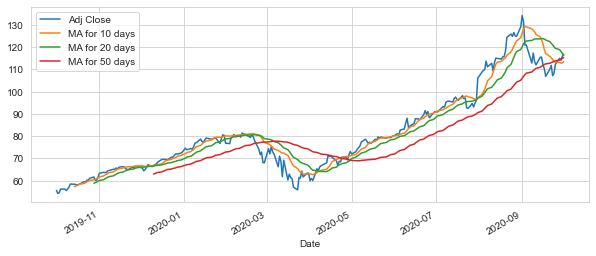

In [49]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [51]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() # calculatin percentage change for each day

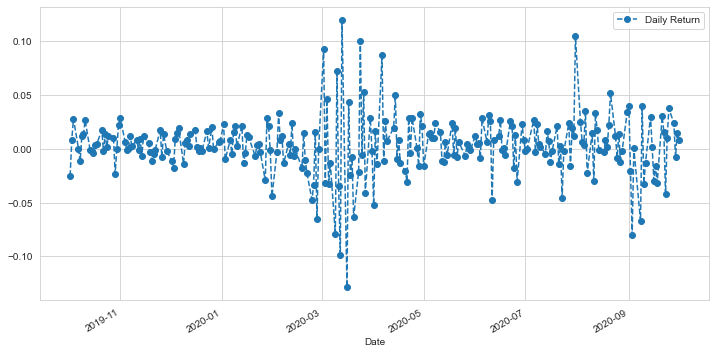

In [59]:
AAPL['Daily Return'].plot(figsize=(12,6),legend=True,linestyle='--',marker='o')

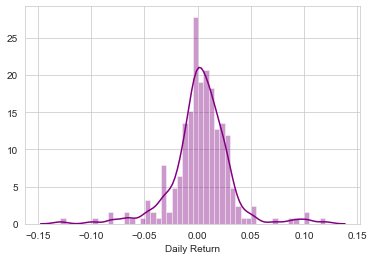

In [61]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='purple')

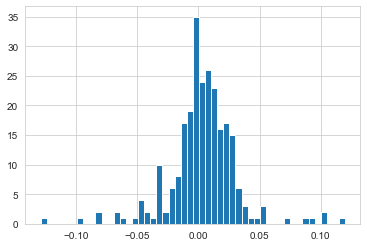

In [63]:
AAPL['Daily Return'].hist(bins=50)

In [66]:
closing_df = pdr.get_data_yahoo(tech_com,start,end)['Adj Close']

In [67]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-01,55.595886,1205.099976,135.527100,1735.650024
2019-10-02,54.202213,1176.630005,133.134323,1713.229980
2019-10-03,54.662643,1187.829956,134.745972,1724.420044
2019-10-04,56.194942,1209.000000,136.565262,1739.650024
2019-10-07,56.207317,1207.680054,135.576523,1732.660034


In [68]:
tech_returns = closing_df.pct_change()

In [69]:
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-01,NaN,NaN,NaN,NaN
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532
2019-10-04,0.028032,0.017822,0.013502,0.008832
2019-10-07,0.000220,-0.001092,-0.007240,-0.004018


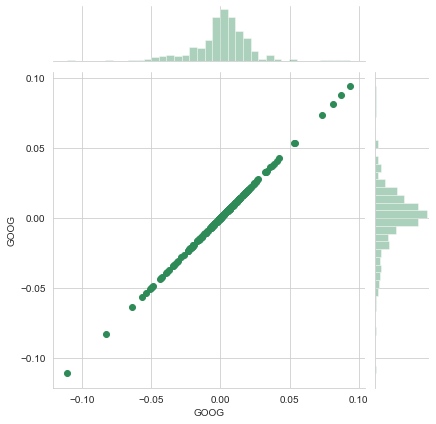

In [70]:
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='seagreen')

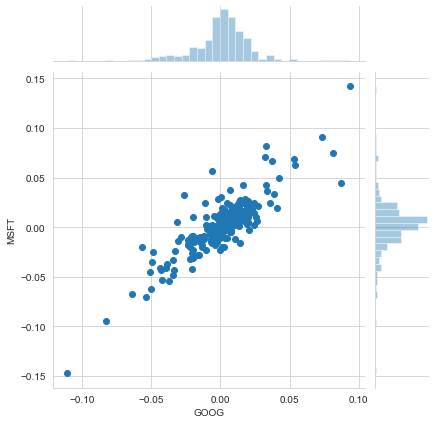

In [71]:
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

In [72]:
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-01,NaN,NaN,NaN,NaN
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532
2019-10-04,0.028032,0.017822,0.013502,0.008832
2019-10-07,0.000220,-0.001092,-0.007240,-0.004018


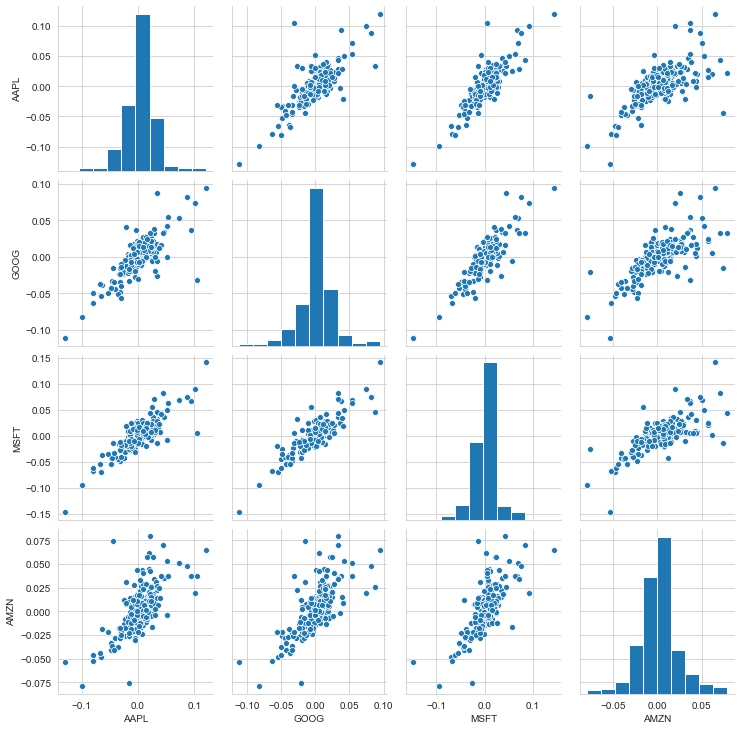

In [73]:
sns.pairplot(tech_returns.dropna())

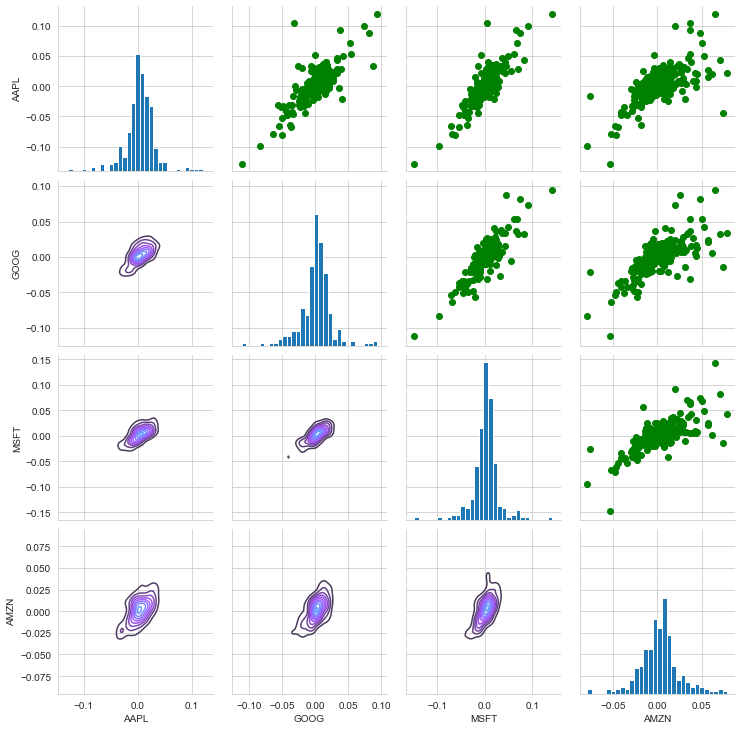

In [76]:
# plotting PairGrid
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

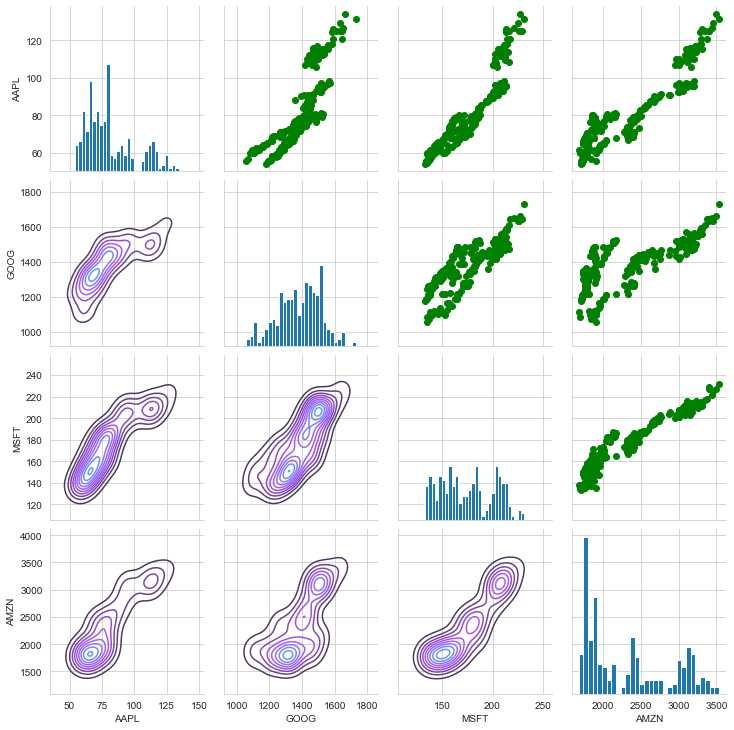

In [77]:
## for correalions between closing prices

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [83]:
corr = tech_returns.dropna().corr()

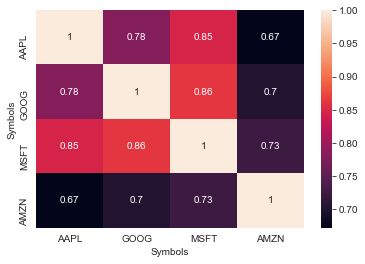

In [84]:
sns.heatmap(corr,annot=True)

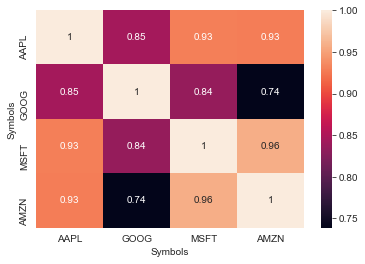

In [85]:
closing = closing_df.corr()

sns.heatmap(closing,annot=True)

In [86]:
## Considering the risk analysis

rets = tech_returns.dropna()

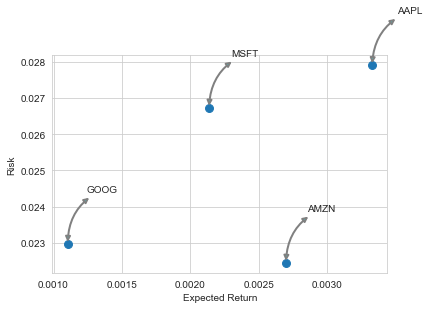

In [114]:
area = np.pi *20 # using this to define area of circles for scatter plots

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


## Plotting the annotation


for label ,x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points',ha='right',va='bottom', # ha- horizontal axes,va--vertical axes
        arrowprops = dict(arrowstyle='<|-|>',fc="cyan", ec="gray", lw=2,connectionstyle='arc3,rad=0.3'))
    

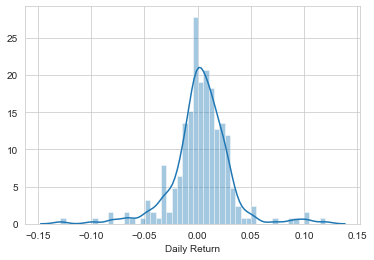

In [115]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=50)

In [116]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532
2019-10-04,0.028032,0.017822,0.013502,0.008832
2019-10-07,0.000220,-0.001092,-0.007240,-0.004018
2019-10-08,-0.011715,-0.015360,-0.010575,-0.015670


In [118]:
rets['AAPL'].quantile(0.05)

-0.04161985444024205

In [119]:
days = 365

dt = 1/days

mu =rets.mean()['GOOG']


sigma = rets.std()['GOOG']

In [125]:
#check Monte carlo method

In [126]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days) # created 3 arrays price,shock and drift
    price[0] = start_price # setting first term as start price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        # calucalate shock terms
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [127]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,1231.229980,1203.579956,1219.000000,1205.099976,1273500,1205.099976
2019-10-02,1196.979980,1171.290039,1196.979980,1176.630005,1615100,1176.630005
2019-10-03,1189.060059,1162.430054,1180.000000,1187.829956,1621200,1187.829956
2019-10-04,1211.439941,1189.170044,1191.890015,1209.000000,1162400,1209.000000
2019-10-07,1218.203979,1203.750000,1204.400024,1207.680054,842900,1207.680054


Text(0.5, 1.0, 'Monte Corlo Analysis for google')

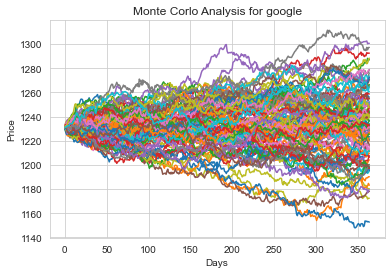

In [128]:
start_price = 1231.229980

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Corlo Analysis for google')

In [129]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

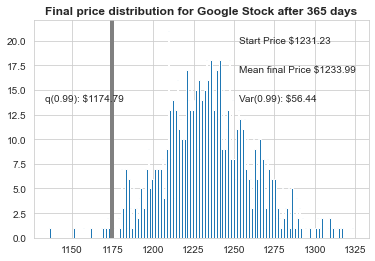

In [150]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# starting price
plt.figtext(0.6,0.8,s='Start Price $%.2f' %start_price)

# Mean Ending price
plt.figtext(0.6,0.7,'Mean final Price $%.2f' %simulations.mean())

# Variance of  price(within 99% of confidence interval)
plt.figtext(0.6,0.6,'Var(0.99): $%.2f' %(start_price - q,))

#Display 1% quartile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' % q)

#plot a line at 1% quartile result
plt.axvline(x=q,linewidth=4,color='gray')


#title
plt.title(u'Final price distribution for Google Stock after %s days' %days,weight='bold')
